# Fonction de détection des faux billets

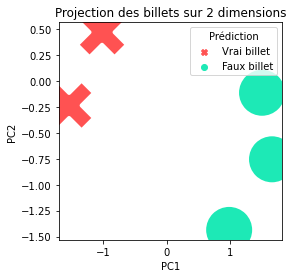

,Prédiction,Probabilité de faux,Probabilité de vrai,id
0,Vrai billet,0.024681,0.975319,B_1
1,Faux billet,0.939766,0.060234,B_2
2,Vrai billet,0.009192,0.990808,B_3
3,Faux billet,0.995937,0.004063,B_4
4,Faux billet,0.866594,0.133406,B_5


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.decomposition import PCA
import pickle

def detection(billets_csv): # Programme de détection des faux billets
 
    train_dict = pickle.load(open('train.p', 'rb'))
    std_scale = train_dict[0]
    regression = train_dict[1]
    pca = train_dict[2]
   
    
    billets = pd.read_csv(billets_csv) # en cas de modif du fichier, ajouter sep='\t')
    X_csv = billets.drop(['id'], axis=1)    
    X_csv = pd.DataFrame(std_scale.transform(X_csv), columns=X_csv.columns) # CSV standardisé
    
    
    y_log = regression.predict(X_csv) # Prédictions
    predictions = []
    for i in range(0, len(y_log)):
        predictions.append(y_log[i])
    
    predictions = pd.concat([ # Jointure des prédictions
        pd.DataFrame(
        [predictions]).rename(index={0: 'Prédiction'}).T.replace(
        {False: 'Faux billet', True: 'Vrai billet'}),
        pd.DataFrame(
        regression.predict_proba(X_csv)).rename(
        columns={0: 'Probabilité de faux', 1: 'Probabilité de vrai'})], axis=1)
    predictions['id'] = billets['id'].unique() 
    
    n_components = 2 # ACP
    reduced = pca.transform(X_csv)
    for i in range(0, n_components):
        predictions['PC' + str(i + 1)] = reduced[:, i]   
    plt.figure(figsize=(4,4))
    sns.scatterplot(data=predictions, x='PC1', y='PC2', markers=['X','o'],
                    hue='Prédiction', style='Prédiction', s=2500, palette=['#ff5252', '#1de9b6'])
    plt.title('Projection des billets sur 2 dimensions')
    plt.show()
    
    return predictions.iloc[:,:-2]
    
detection('test_notes.csv')